# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
pyber_data_df["ride_id"].count()
# Calculate the percentage of rides for each city type.
riders = pyber_data_df.groupby(["type"]).count()["ride_id"]
riders_df = pd.DataFrame(riders)
riders_df

,ride_id
type,
Rural,125
Suburban,625
Urban,1625


In [4]:
# 2. Get the total drivers for each city type
drivers = pyber_data_df.groupby(["type"]).sum()["driver_count"]
drivers_df = pd.DataFrame(drivers)
drivers_df

,driver_count
type,
Rural,537
Suburban,8570
Urban,59602


In [5]:
#  3. Get the total amount of fares for each city type
fares_city = pyber_data_df.groupby(["type"]).sum()["fare"]
fares_city_df = pd.DataFrame(fares_city)
fares_city_df

,fare
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [6]:
#  4. Get the average fare per ride for each city type. 
city_avg_fare = pyber_data_df.groupby(["type"]).mean()["fare"]
city_avg_fare_df = pd.DataFrame(city_avg_fare)
city_avg_fare_df

,fare
type,
Rural,34.623440
Suburban,30.970128
Urban,24.525772


In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = (pyber_data_df.groupby(["type"]).sum()["fare"] / drivers)
avg_fare_per_driver_df = pd.DataFrame(avg_fare_per_driver)
avg_fare_per_driver_df

,0
type,
Rural,8.059460
Suburban,2.258615
Urban,0.668675


In [8]:
#  6. Create a PyBer summary DataFrame. 
# summary_df = [riders_df,drivers_df,fares_city_df,city_avg_fare_df,avg_fare_per_driver_df]
s1 = pd.merge(riders_df, drivers_df, how="left", on=["type"])
s2 = pd.merge(fares_city_df, city_avg_fare_df, how="left", on=["type"])
s3 = pd.merge(s1,avg_fare_per_driver_df, how="left", on=["type"])
summary = pd.merge(s2, s3, how="left", on=["type"])

summary = summary.rename(columns={"fare_x": "Total Fares", "fare_y": "Average Fare per Ride", 0: "Average Fare per Driver",
                                      "ride_id": "Total Rides", "driver_count": "Total Drivers"})
pyber_summary_df = summary[["Total Rides","Total Drivers","Total Fares","Average Fare per Ride","Average Fare per Driver"]]
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.

# Adding a list of values with keys to create a new DataFrame and apply formatting.
pyber_summary_df = pd.DataFrame(
          {"Total Rides": riders.map("{:,}".format),
          "Total Drivers": drivers.map("{:,}".format),
          "Total Fares": fares_city.map("${:,.2f}".format),
          "Average Fare per Ride": city_avg_fare.map("${:,.2f}".format),
          "Average Fare per Driver": avg_fare_per_driver.map("${:,.2f}".format)})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
# Rename columns in combined ride dataframe
pyber_data_df.rename(columns = {'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}, inplace=True)
pyber_data_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [12]:
# Set the index to the data
pyber_data_df = pyber_data_df.set_index(['Date'])

In [13]:
# Make a copy with fewer columns
pyber_data_df_copy = pyber_data_df.copy()[['Fare', 'City Type']]
pyber_data_df_copy

,Fare,City Type
Date,,
2019-01-14 10:14:22,13.83,Urban
2019-03-04 18:24:09,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:03,23.44,Urban
2019-03-06 04:28:35,34.58,Urban
...,...,...
2019-04-29 17:04:39,13.38,Rural
2019-01-30 00:05:47,20.76,Rural
2019-02-10 21:03:50,11.11,Rural


In [14]:
# Change the datatype of the index to datetime
pyber_data_df_copy.index = pd.to_datetime(pyber_data_df_copy.index)
pyber_data_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fare       2375 non-null   float64
 1   City Type  2375 non-null   object 
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [15]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_data_df_fare_by_type = pd.DataFrame(pyber_data_df_copy.groupby(['City Type', 'Date']).sum()['Fare'])
pyber_data_df_fare_by_type.reset_index()
pyber_data_df_fare_by_type

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:49  18.45
          2019-05-08 07:29:01  18.55
          2019-05-08 11:38:35  19.77
          2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [16]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_pivot = pd.pivot_table(pyber_data_df_fare_by_type, values="Fare", index=["Date"], columns=['City Type'])
pyber_pivot

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [17]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot_df = pyber_pivot.loc['2019-01-01':'2019-04-28']
pyber_pivot_df.tail()

City Type,Rural,Suburban,Urban
Date,,,
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN
2019-04-28 19:35:03,NaN,16.96,NaN


In [24]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_pivot_df = pyber_pivot.loc['2019-01-01':'2019-04-28']
pyber_pivot_df.tail()

City Type,Rural,Suburban,Urban
Date,,,
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN
2019-04-28 19:35:03,NaN,16.96,NaN


In [25]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pyber_data_df_copy.index = pd.to_datetime(pyber_data_df_copy.index)
pyber_data_df_fare_by_type = pd.DataFrame(pyber_data_df_copy.groupby(['City Type', 'Date']).sum()['Fare'])


In [26]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_data_df_copy.index = pd.to_datetime(pyber_data_df_copy.index)
pyber_data_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fare       2375 non-null   float64
 1   City Type  2375 non-null   object 
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [27]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_pivot_df_weekly = pyber_pivot_df.resample('W').sum()
pyber_pivot_df_weekly

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


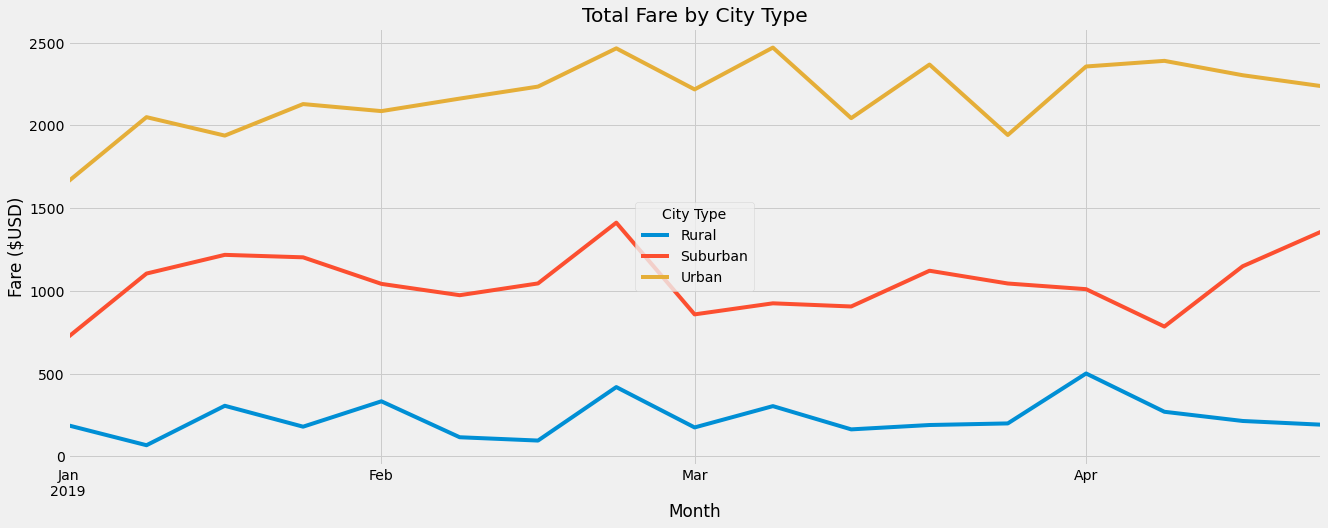

In [23]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Create a plot
ax = pyber_pivot_df_weekly.plot(figsize=(20, 7.5))
                                
# Create titles, axis labels, and legend
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel("Month")

# Save plot to analysis folder
plt.savefig("pyber_challenge.png")

plt.show()